In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Задача 3
Измерения длины головы (X) и длины грудного плавника (Y) у 16 окуней дали результаты (в мм):
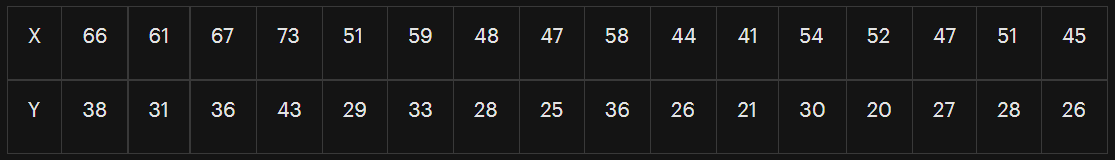

Что можно сказать о силе и направленности зависимости между X и Y? 

Решите задачу для трёх случаев: 

в предположении, что признаки распределены нормально; 
в предположении, что признаки распределены ненормально и зависимость монотонная;
в предположении, что признаки распределены ненормально и зависимость немонотонная.

Если нормальное распределение:
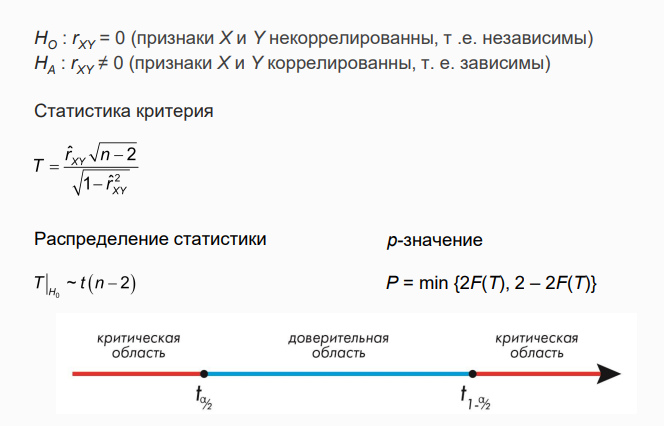


In [4]:
x = np.array([66, 61, 67, 73, 51, 59, 48, 47 , 58, 44, 41, 54, 52, 47, 51, 45])

In [5]:
y = np.array([38, 31, 36, 43, 29, 33, 28, 25, 36, 26, 21, 30, 20, 27, 28, 26])

In [6]:
#выборочная корреляция

В случае нормального распределения:
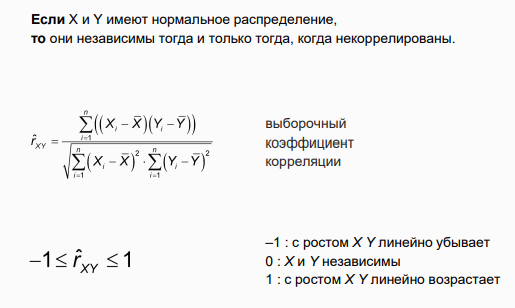

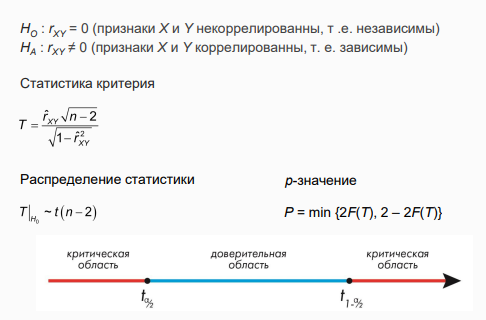

In [7]:
stats.pearsonr(x,y)

(0.8893853779200405, 4.036815535474195e-06)

In [8]:
# на любом уровне значимости, велечины НЕЗАВИСИМЫ

Подозревается монотонная зависимость:
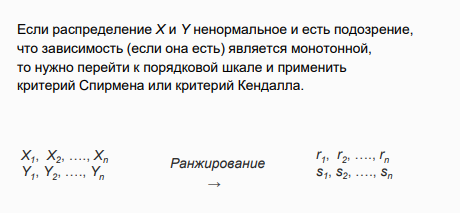

In [10]:
# коэфф спирмена

In [9]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.8583028167652765, pvalue=2.096824258861966e-05)

In [12]:
#коэфф кендела

In [10]:
stats.kendalltau(x,y)

KendalltauResult(correlation=0.7404322357228396, pvalue=8.25894556613836e-05)

In [11]:
# на любом уровне значимости, велечины НЕЗАВИСИМЫ

Подозревается немонотонная зависимость
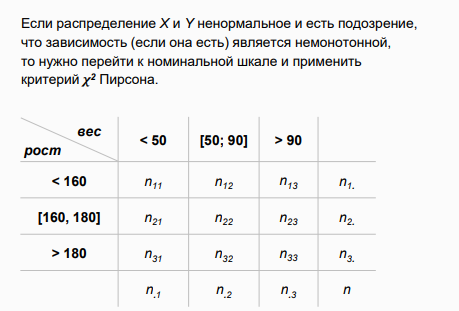


In [14]:
# переход к номинальной шкале

In [12]:
def to_nominal (X, Y, N):
    x_step = (max(X) - min(X)) / N
    y_step = (max(Y) - min(Y)) / N
    x = min(X)
    n = len(X)
    nom = []
    while x < max(X):
        row = []
        y = min(Y)
        while (y < max(Y)):
            count = 0
            for i in range(n):
                if(X[i] >= x) & (X[i] < x + x_step) & (Y[i] >= y) & (Y[i] < y + y_step):
                    count+= 1
            row.append(count)
            y += y_step
        nom.append(row)
        x += x_step
    nom[N - 1][N - 1] += 1
    return np.array(nom)

In [13]:
contin = to_nominal(x,y, 2)
print(contin)

[[10  0]
 [ 1  5]]


In [20]:
# критерий хи квадрат пирсона

In [14]:
stats.chi2_contingency(contin)

(8.552727272727271,
 0.003450049583251144,
 1,
 array([[6.875, 3.125],
        [4.125, 1.875]]))

In [15]:
# на любом уровне значимости, велечины НЕЗАВИСИМЫ